In [2]:
import pandas
from time import time

cols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

kddData = pandas.read_csv("kddcupFull.csv", header=None, names = cols)

In [3]:
featureNames = [
    "duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"
]

features = kddData[featureNames].astype(float)

In [4]:
labels = kddData['label'].copy()
labels[labels!='normal.'] = 'attack.'

normal.    595798
attack.    452778
Name: label, dtype: int64

In [5]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(features,labels)

Classified in 181.293 seconds


In [6]:
kddDataTest = pandas.read_csv("corrected.csv", header=None, names = featureNames)
kddDataTest['label'].value_counts()

testData = kddDataTest[num_features].astype(float)
trueLabels = kddDataTest['label'].copy()
true_labels[true_labels!='normal.'] = 'attack.'

In [7]:
pred = clf.predict(testData)
new_labels = pred

Assigned labels in 0.515 seconds




Accuracy 91.659 %


Confusion Matrix: 

 [[225598  24838]
 [  1105  59488]]


Classification Scores: 

               precision    recall  f1-score   support

     attack.       1.00      0.90      0.95    250436
     normal.       0.71      0.98      0.82     60593

    accuracy                           0.92    311029
   macro avg       0.85      0.94      0.88    311029
weighted avg       0.94      0.92      0.92    311029



Hamming Loss 0.08341022862819866


Jaccard Score 0.8577964432479516


Matthews corrcoef 0.7863330653167945


Zero-One Loss 0.08341022862819869


<AxesSubplot:>

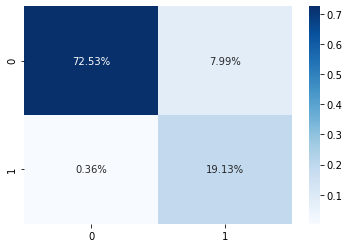

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score = accuracy_score(true_labels, new_labels)
print("\n\nAccuracy {} %".format(round(accuracy_score*100,3)))

confusion_matrix = confusion_matrix(true_labels, new_labels)
print("\n\nConfusion Matrix: \n\n {}".format(confusion_matrix))

classification_report = classification_report(true_labels, new_labels)
print("\n\nClassification Scores: \n\n {}".format(classification_report))

import seaborn as sns
import numpy as np
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')